# Homework1: Crime Data Analyst (For Big Data Analytics and Applications)

## Main objective

This homework is a warm-up to test your skills of handling data including loading data, data cleanning, and plotting by **using python under jupyter notework environement**. Please try to write python code to complete the tasks. If you never learn python before, you can review the python materials in class and try to complete the tasks as much as you can.

## Scenario
As a data science expert, you got a job from a police departement from another city. They want your help to analyze crime in the city with data science. Therefore they provide you with a data set from their city. They ask you to answer a few questions and plot interesting trends for the year 2017, which you will answer in a report based on the data set provided:


### Plan of attack:

1. **Load the crime data set in 'data/crime_data.csv' and investigate: (5%)**
    1. From what area is this data? (Lat and Long might help) (Use Google)
    2. From which year(s) is the data?
    3. How many crimes have been reported in total? (each row of the data refers to one reported crime.)


2. **Clean the the data: (25%):**
    1. remove the columns: "UCR PARTS" and "Location", which are not needed 
    2. the column "SHOOTING" only has the value `"Y"` (for yes) inside, if a shooting was reported for that crime. Otherwise, this value is NaN (not a number). Therefore clean this column by placing a `"N"` (for no) when no shooting was reported. 
    3. only use rows which where committed in the year __2017__, therefore remove other years.
    4. remove any row with incomplete data, e.g. remove any row which still has empty values.
    5. Save the cleaned data under 'data/clean_crime.csv' and use it for plotting.


3. **Create the following plots and answer the attached question: (60%)**
    1. Create a bar chart, which displays the frequency of each crime type (use the column OFFENSE_CODE_GROUP). What is the most frequent crime type?
    
    2. Show the total crime count per hour for all days of the week. Therefore, create a line chart with the hours of a day on the x-axis and the total count of crimes on the y-axis. How does crime proceed during the day?
    
    3. For each district, create a Pie Chart, which shows the count of crimes for each street. Some districts have quite a lot of streets, therefore only display the **7** top streets. What is the street with most crimes for each district?
    
    4. Create a Crime Map, which displays the crime types:
        1. Robbery
        2. Auto Theft
        3. Simple Assault
        4. Larcency
        5. Drug Violation
        6. Crimes with SHOOTING
        
       You **dont't** need to download or insert an actual map or image of a map. Simply plot the Lat and Long values as Y- and X-values in a scatter plot, and give each crime type a different marker. Since we want to focus on the  areas center, remove outliers (42.2< Lat < 42.4 and -71.2< Long < -70.9). What is the hotspot (mean) of each crime type? 
4. **__(Extra Credit)__ (10%)**
    1. You may create any additional interisting plots, which you would like to present in the class! Please present your findings. (Don't prepare a powerpoint, simply share your plot and tell us what you did. 1-2 minutes).
    
### Hand in:
Hand in the following files:
   - your code in a jupyter notebook (_.ipynb_) or standard python source code (_.py_).
   - a _.pdf_ with your findings and plots (you can easily create a PDF in juypter notebook under ->File-> Download as-> PDF via Latex, might need to install some software)
   
The files should have your name(s) or your studentID in them, ex: _homework1_M112010001.ipynb_ , _homework1_M112010001.py_, or _homework1_M112010001.pdf_.

Send the _.zip_ file to moodle system (moodle2.ntust.edu.tw) before **Tuesday March 5 2024 09:00 AM**.  


### Note on implementation:
- for each task, create a cell and answer the question(s) with 1-2 sentences in a markdown cell.
- when plotting, try to create one plot, before creating multiple plots for different districts or crime types


# Load the crime dataset and investigate: (5%)

1. **From what area is this data?**
    - These materials are primarily sourced from the area near Boston, USA.

2. **From which year(s) is the data?**
    - The data is from the year 2015 to 2018.

3. **How many crimes have been reported in total?**
    - There are 319073 reported crimes in total.


In [1]:
import pandas as pd

# Load the crime data
crime_data = pd.read_csv('data/crime_data.csv')


### Section1, Q2

In [2]:
# Show the distribution of the 'YEAR' column
year_distribution = crime_data['YEAR'].value_counts().sort_index()
print(year_distribution)

# Determine the range of years in the dataset
min_year = crime_data['YEAR'].min()
max_year = crime_data['YEAR'].max()
print(f"The dataset contains data from {min_year} to {max_year}.")

YEAR
2015     53388
2016     99114
2017    100886
2018     65685
Name: count, dtype: int64
The dataset contains data from 2015 to 2018.


### Section1, Q3

In [3]:
# Count all rows
total_rows = crime_data.shape[0]
print(f"The dataset contains {total_rows} rows.")

The dataset contains 319073 rows.


# Clean the the data (25%)

### remove columns: `UCR PARTS` and `Location`

In [4]:
crime_data = crime_data.drop(columns=['UCR_PART', 'Location'])

### replace column `SHOOTING` value from NaN to "N"

In [5]:
crime_data['SHOOTING'] = crime_data['SHOOTING'].fillna('N')

print(crime_data['SHOOTING'].value_counts())

SHOOTING
N    318054
Y      1019
Name: count, dtype: int64


### Remove rows with incomplete data

In [6]:
crime_data = crime_data.dropna()
print(f"The cleaned dataset contains {crime_data.shape[0]} rows.")

The cleaned dataset contains 296663 rows.


### Save the cleaned data under 'data/clean_crime.csv'

In [7]:
# Save the cleaned data to a CSV file
crime_data.to_csv('data/clean_crime.csv', index=False)

# Create plots and answer the question (60%)

1. **Create `OFFENSE_CODE_GROUP` bar chart. What is the most frequent crime type?**
    - The most frequent crime type is: Motor Vehicle Accident Response

2. **Show the total crime count per hour for all days of the week. How does crime proceed during the day?**
    - Crime count is highest during the afternoon and evening hours, with a peak around 17:00.

3. **For each district, create a Pie Chart, which shows the count of crimes for each street. What is the street with most crimes for each district?**
    - The street with most crimes in district D14 is: COMMONWEALTH AVE
    - The street with most crimes in district C11 is: DORCHESTER AVE
    - The street with most crimes in district D4 is: BOYLSTON ST
    - The street with most crimes in district B3 is: BLUE HILL AVE
    - The street with most crimes in district B2 is: WASHINGTON ST
    - The street with most crimes in district C6 is: MASSACHUSETTS AVE
    - The street with most crimes in district A1 is: WASHINGTON ST
    - The street with most crimes in district E5 is: WASHINGTON ST
    - The street with most crimes in district A7 is: BORDER ST
    - The street with most crimes in district E13 is: CENTRE ST
    - The street with most crimes in district E18 is: HYDE PARK AVE
    - The street with most crimes in district A15 is: BUNKER HILL ST
4. **Create the Crime Map.**
    - The hotspot (mean) of Robbery is at Lat: 42.3236237837616, Long: -71.07857710376874
    - The hotspot (mean) of Auto Theft is at Lat: 42.32050887768, Long: -71.08149869921778
    - The hotspot (mean) of Simple Assault is at Lat: 42.3239079735243, Long: -71.08047347291703
    - The hotspot (mean) of Larceny is at Lat: 42.333113582008224, Long: -71.08115638514109
    - The hotspot (mean) of Drug Violation is at Lat: 42.32335131354487, Long: -71.07982324173558
    - The hotspot (mean) of Shooting is at Lat: 42.31069558706968, Long: -71.08274674623976

### Section3, Q1

Create a bar chart, which displays the frequency of each crime type (use the column OFFENSE_CODE_GROUP). What is the most frequent crime type?

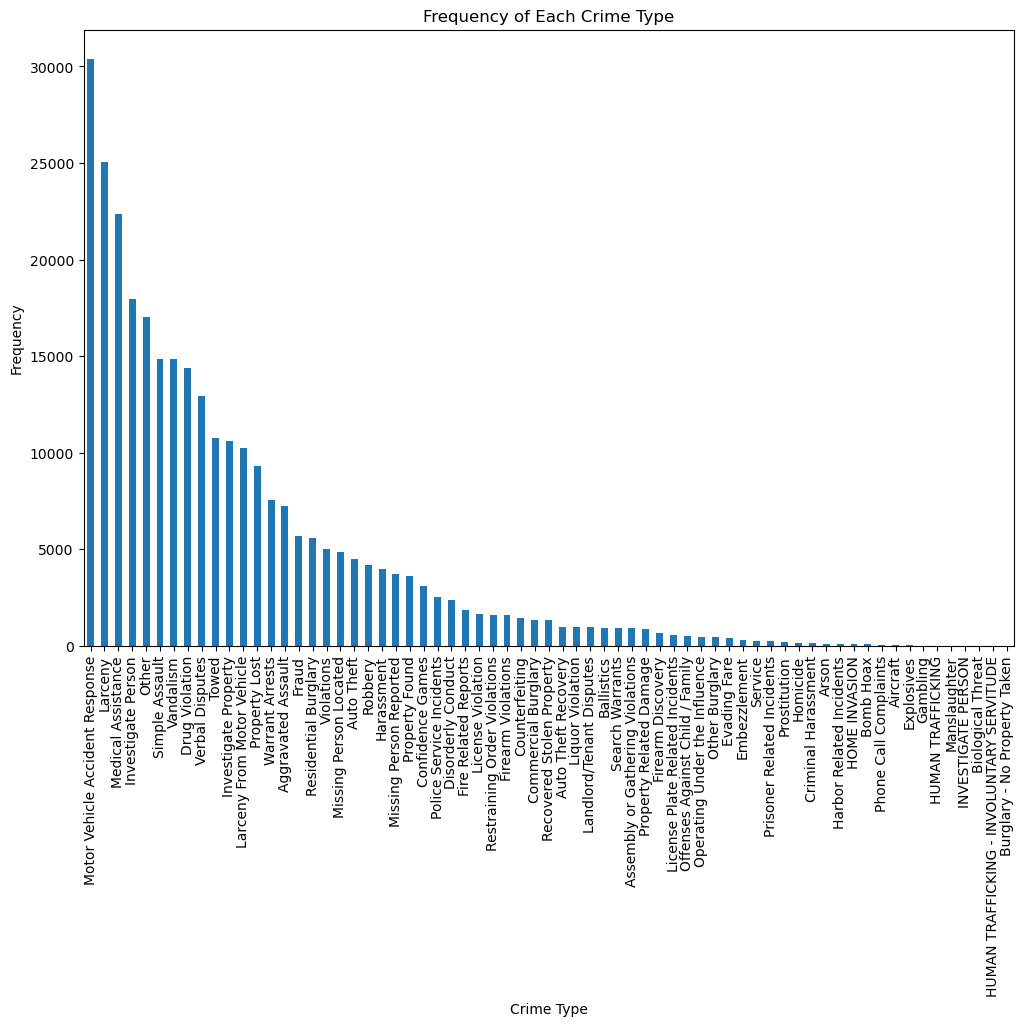

The most frequent crime type is: Motor Vehicle Accident Response


In [8]:
import matplotlib.pyplot as plt

# Calculate the frequency of each crime type
crime_type_counts = crime_data['OFFENSE_CODE_GROUP'].value_counts()

# Create a bar chart
plt.figure(figsize=(12, 8))
crime_type_counts.plot(kind='bar')
plt.title('Frequency of Each Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

# Determine the most frequent crime type
most_frequent_crime_type = crime_type_counts.idxmax()
print(f"The most frequent crime type is: {most_frequent_crime_type}")

### Section3, Q2

Show the total crime count per hour for all days of the week. Therefore, create a line chart with the hours of a day on the x-axis and the total count of crimes on the y-axis. How does crime proceed during the day?

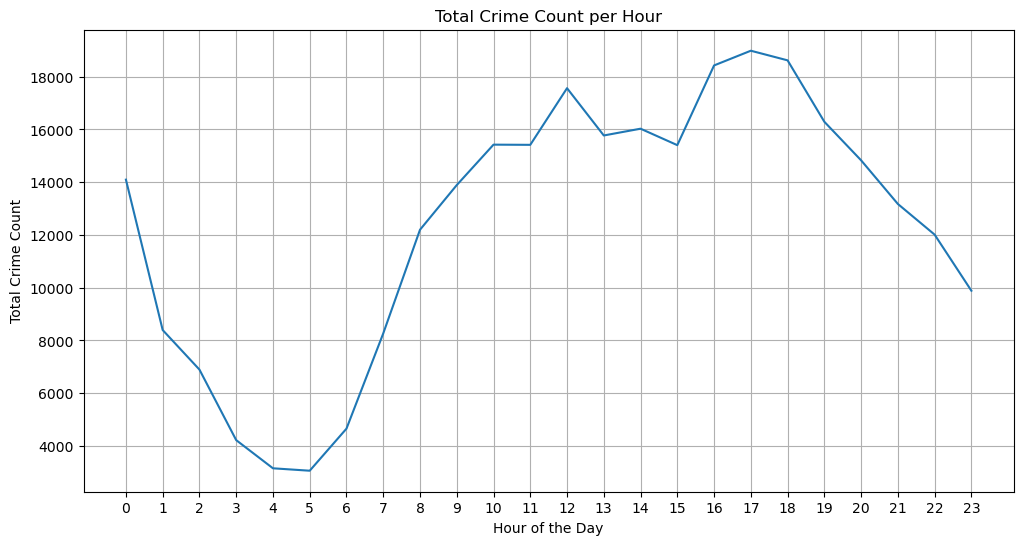

In [9]:
# Group the data by 'HOUR' and count the number of crimes for each hour
hourly_crime_counts = crime_data.groupby('HOUR').size()

# Create a line chart
plt.figure(figsize=(12, 6))
hourly_crime_counts.plot(kind='line')
plt.title('Total Crime Count per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Crime Count')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### Section3, Q3

For each district, create a Pie Chart, which shows the count of crimes for each street. Some districts have quite a lot of streets, therefore only display the **7** top streets. What is the street with most crimes for each district?

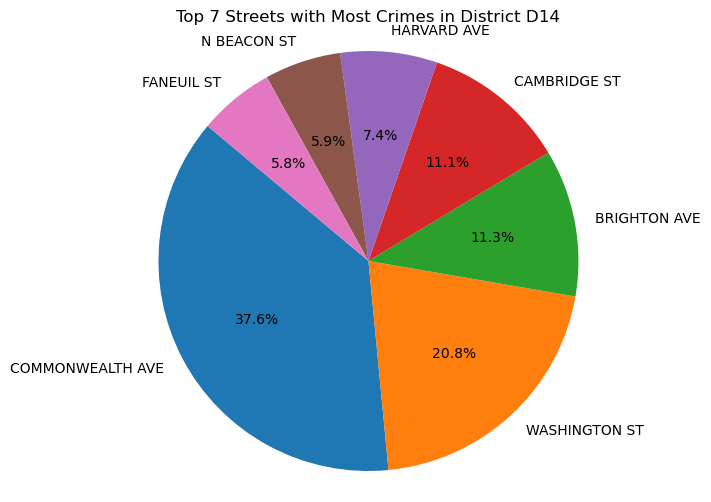

The street with most crimes in district D14 is: COMMONWEALTH AVE


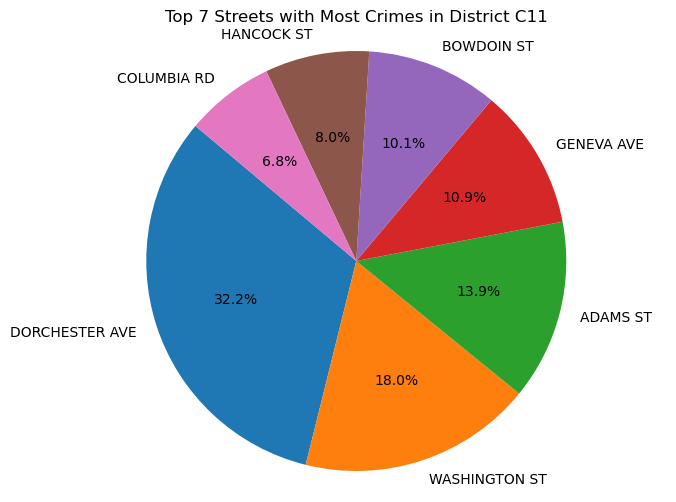

The street with most crimes in district C11 is: DORCHESTER AVE


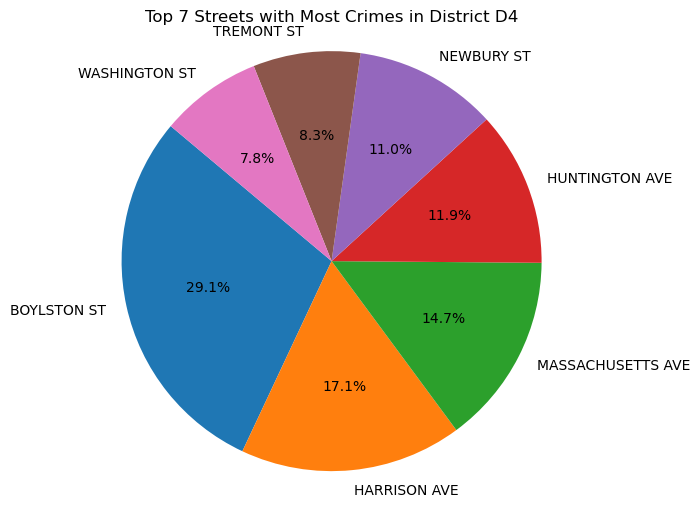

The street with most crimes in district D4 is: BOYLSTON ST


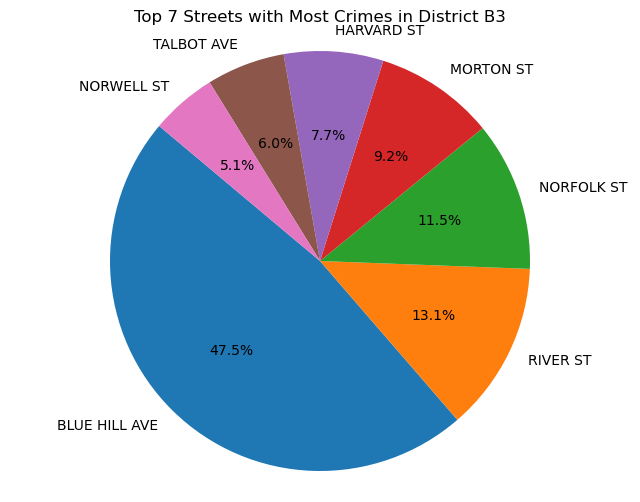

The street with most crimes in district B3 is: BLUE HILL AVE


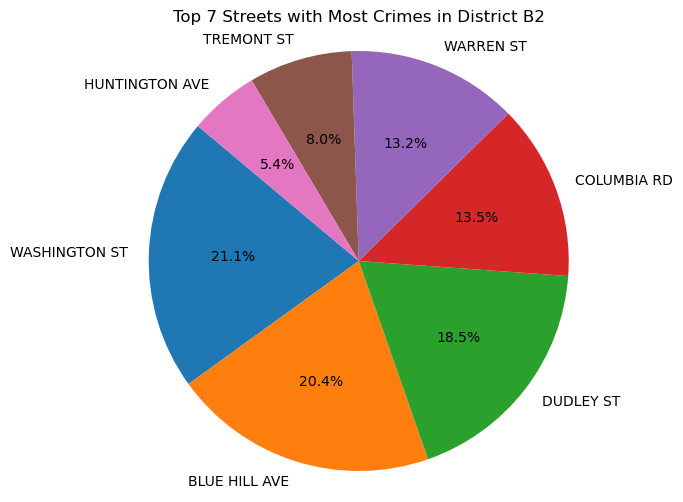

The street with most crimes in district B2 is: WASHINGTON ST


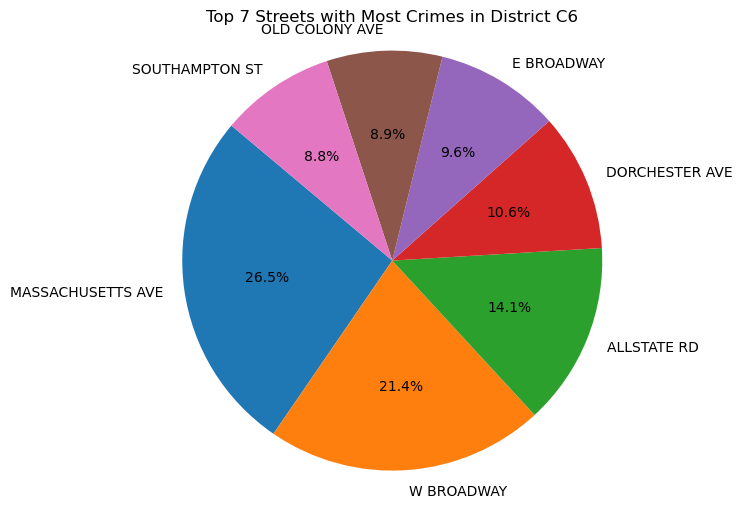

The street with most crimes in district C6 is: MASSACHUSETTS AVE


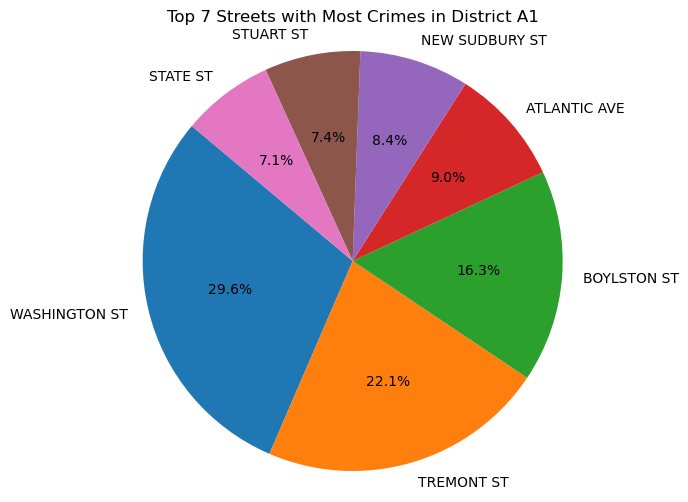

The street with most crimes in district A1 is: WASHINGTON ST


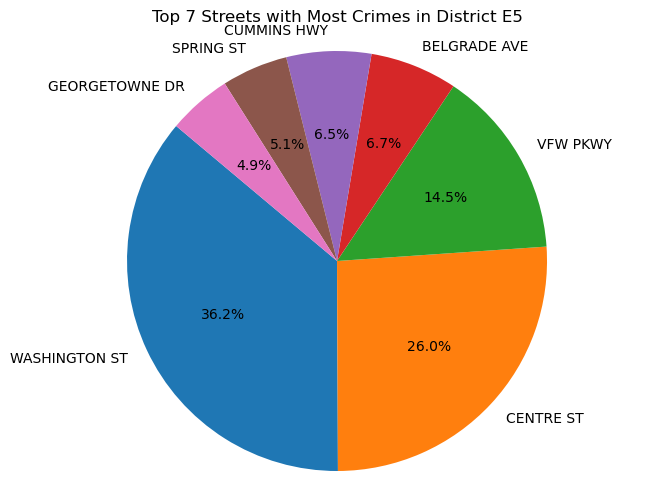

The street with most crimes in district E5 is: WASHINGTON ST


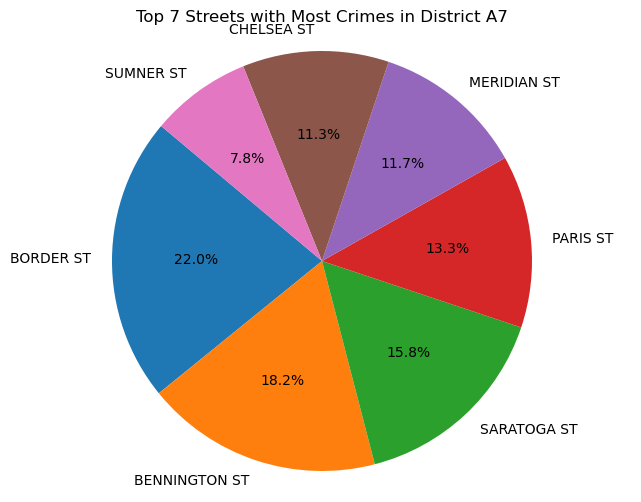

The street with most crimes in district A7 is: BORDER ST


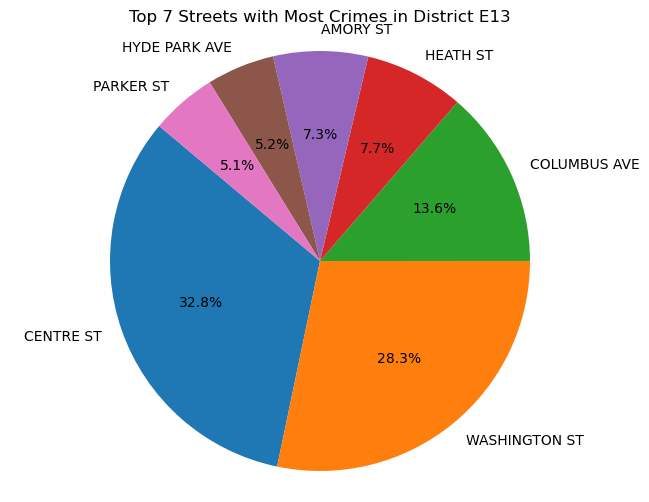

The street with most crimes in district E13 is: CENTRE ST


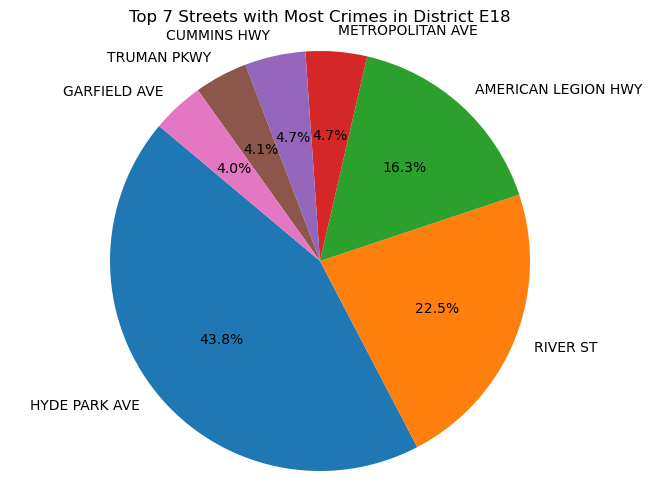

The street with most crimes in district E18 is: HYDE PARK AVE


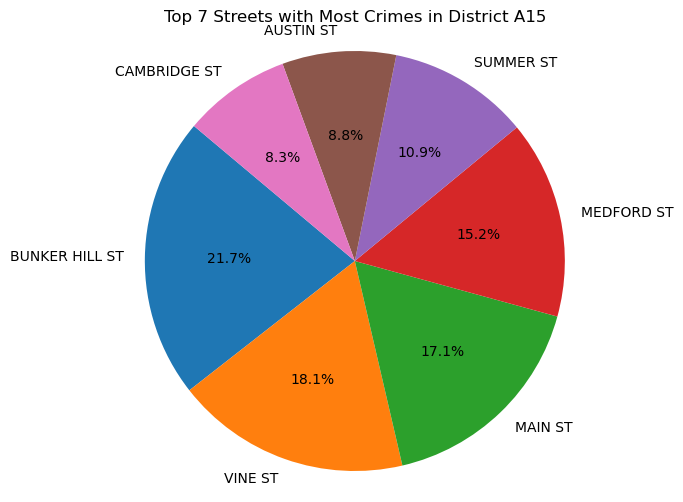

The street with most crimes in district A15 is: BUNKER HILL ST


In [10]:
# Group the data by 'DISTRICT' and 'STREET' and count the number of crimes for each street
district_street_counts = crime_data.groupby(['DISTRICT', 'STREET']).size().reset_index(name='count')

# Function to plot pie chart for each district
def plot_pie_chart_for_district(district):
    # Filter data for the district
    district_data = district_street_counts[district_street_counts['DISTRICT'] == district]
    
    # Sort the data by count and get the top 7 streets
    top_streets = district_data.nlargest(7, 'count')
    
    # Plot the pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(top_streets['count'], labels=top_streets['STREET'], autopct='%1.1f%%', startangle=140)
    plt.title(f'Top 7 Streets with Most Crimes in District {district}')
    plt.axis('equal')
    plt.show()
    
    # Determine the street with most crimes
    most_crimes_street = top_streets.iloc[0]['STREET']
    print(f"The street with most crimes in district {district} is: {most_crimes_street}")

# Get the list of unique districts
districts = crime_data['DISTRICT'].unique()

# Plot pie chart for each district
for district in districts:
    plot_pie_chart_for_district(district)

### Section3, Q4

Create a Crime Map, which displays the crime types:
1. Robbery
2. Auto Theft
3. Simple Assault
4. Larcency
5. Drug Violation
6. Crimes with SHOOTING
        
You **dont't** need to download or insert an actual map or image of a map. Simply plot the Lat and Long values as Y- and X-values in a scatter plot, and give each crime type a different marker. Since we want to focus on the  areas center, remove outliers (42.2< Lat < 42.4 and -71.2< Long < -70.9). What is the hotspot (mean) of each crime type? 

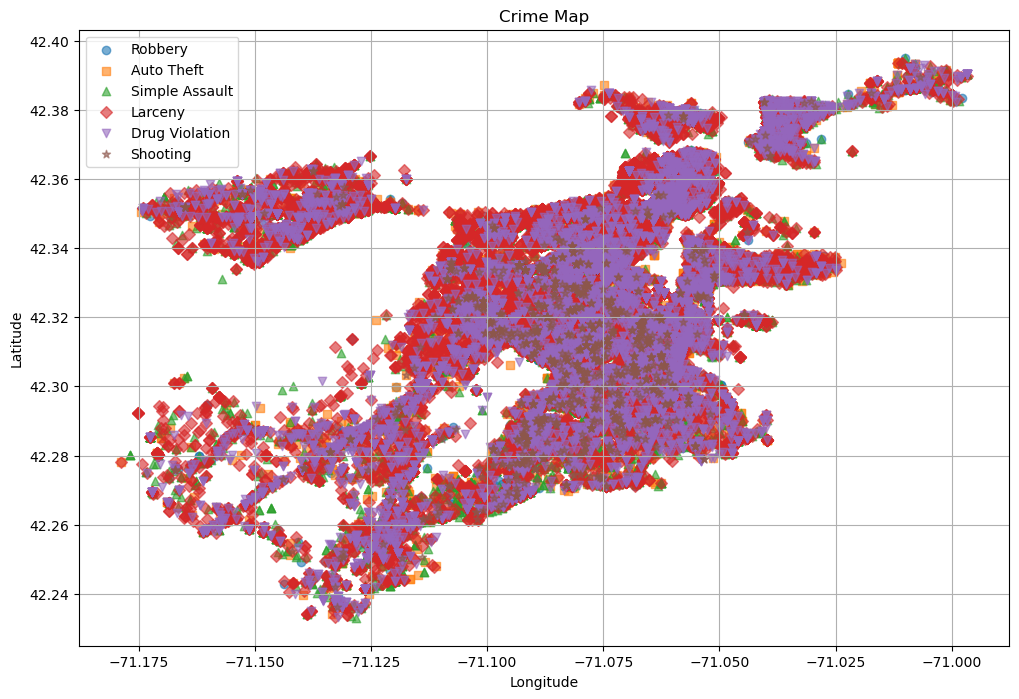

The hotspot (mean) of Robbery is at Lat: 42.3236237837616, Long: -71.07857710376874
The hotspot (mean) of Auto Theft is at Lat: 42.32050887768, Long: -71.08149869921778
The hotspot (mean) of Simple Assault is at Lat: 42.3239079735243, Long: -71.08047347291703
The hotspot (mean) of Larceny is at Lat: 42.333113582008224, Long: -71.08115638514109
The hotspot (mean) of Drug Violation is at Lat: 42.32335131354487, Long: -71.07982324173558
The hotspot (mean) of Shooting is at Lat: 42.31069558706968, Long: -71.08274674623976


In [11]:
import numpy as np

import matplotlib.pyplot as plt

# Filter the data for the specified crime types
crime_types = ['Robbery', 'Auto Theft', 'Simple Assault', 'Larceny', 'Drug Violation']
filtered_data = crime_data[(crime_data['OFFENSE_CODE_GROUP'].isin(crime_types)) | (crime_data['SHOOTING'] == 'Y')]

# Remove outliers
filtered_data = filtered_data[(filtered_data['Lat'] > 42.2) & (filtered_data['Lat'] < 42.4) & 
                              (filtered_data['Long'] > -71.2) & (filtered_data['Long'] < -70.9)]

# Define markers for each crime type
markers = {
    'Robbery': 'o',
    'Auto Theft': 's',
    'Simple Assault': '^',
    'Larceny': 'D',
    'Drug Violation': 'v',
    'Shooting': '*'
}

# Plot the data
plt.figure(figsize=(12, 8))
for crime_type, marker in markers.items():
    if crime_type == 'Shooting':
        subset = filtered_data[filtered_data['SHOOTING'] == 'Y']
    else:
        subset = filtered_data[filtered_data['OFFENSE_CODE_GROUP'] == crime_type]
    plt.scatter(subset['Long'], subset['Lat'], label=crime_type, marker=marker, alpha=0.6)

plt.title('Crime Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the hotspot (mean) of each crime type
for crime_type in markers.keys():
    if crime_type == 'Shooting':
        subset = filtered_data[filtered_data['SHOOTING'] == 'Y']
    else:
        subset = filtered_data[filtered_data['OFFENSE_CODE_GROUP'] == crime_type]
    mean_lat = subset['Lat'].mean()
    mean_long = subset['Long'].mean()
    print(f"The hotspot (mean) of {crime_type} is at Lat: {mean_lat}, Long: {mean_long}")

# Extra Credit (10%)